In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the uploaded dataset
uploaded_df = pd.read_csv('/content/new_dataset2.csv')

# Display the first few rows
uploaded_df.head()

CaseID      Location        Date   Age  Gender  \
0     1.0      Virginia  2023-09-26  86.0  Female   
1     2.0       Georgia  2022-07-22   9.0  Female   
2     3.0         Texas  2022-06-12  82.0  Female   
3     4.0  Pennsylvania  2022-05-25  20.0    Male   
4     5.0    California  2023-03-16  32.0  Female   

                          Cause Transmission Route  Symptoms   Outcome  \
0             Contaminated Food         Waterborne  Diarrhea  Recovery   
1                           NaN          Foodborne  Diarrhea  Recovery   
2             Contaminated Food           Zoonotic  Diarrhea  Recovery   
3  Contact with Infected Animal         Waterborne  Diarrhea  Recovery   
4  Contact with Infected Person          Foodborne  Diarrhea     Fatal   

  Underlying Conditions Water Source Food Source     Occupation  \
0                   NaN        River         NaN       Engineer   
1          Hypertension        River        Home           Chef   
2                   HIV        River         NaN  Office Worker   
3                   NaN          NaN         NaN           Chef   
4                   NaN         Well  Restaurant       Engineer   

  Travel History Diagnosis Method            Treatment  Duration of Illness  \
0            NaN              PCR  Antiparasitic Drugs                 10.0   
1  International       Microscopy  Antiparasitic Drugs                  3.0   
2          Local       Microscopy  Rehydration Therapy                 12.0   
3          Local       Microscopy  Antiparasitic Drugs                 27.0   
4  International       Microscopy  Antiparasitic Drugs                 22.0   

  Hospitalized Severity  Preventive Measures  
0           No   Severe  Use Protective Gear  
1          Yes   Severe           Wash Hands  
2           No     Mild  Use Protective Gear  
3          Yes     Mild     Isolate Patients  
4           No   Severe  Use Protective Gear

In [ ]:
uploaded_df.duplicated().sum()

0

In [ ]:
uploaded_df.isnull().sum()

CaseID                    50
Location                  50
Date                       0
Age                       49
Gender                    50
Cause                     50
Transmission Route        50
Symptoms                  50
Outcome                   50
Underlying Conditions    596
Water Source             370
Food Source              354
Occupation                50
Travel History           379
Diagnosis Method          50
Treatment                 50
Duration of Illness       50
Hospitalized              50
Severity                  50
Preventive Measures       50
dtype: int64

In [ ]:
# Identify and remove anomalies in the dataset

#Remove rows with invalid ages
cleaned_df = uploaded_df[uploaded_df['Age'] >= 0]

#Remove rows with invalid dates
cleaned_df = cleaned_df[cleaned_df['Date'] != 'Invalid Date']

# Fill missing values with appropriate placeholders or statistical values
cleaned_df['Cause'].fillna('Unknown', inplace=True)
cleaned_df['Water Source'].fillna('Unknown', inplace=True)
cleaned_df['Food Source'].fillna('Unknown', inplace=True)
cleaned_df['Travel History'].fillna('None', inplace=True)
cleaned_df['Underlying Conditions'].fillna('None', inplace=True)

#Convert necessary columns to appropriate data types
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce')

#Save cleaned data to the new csv file
cleaned_df.to_csv('/content/dataset2.csv', index=False)

# Display the first few rows
cleaned_df.head()


CaseID      Location       Date   Age  Gender  \
0     1.0      Virginia 2023-09-26  86.0  Female   
1     2.0       Georgia 2022-07-22   9.0  Female   
2     3.0         Texas 2022-06-12  82.0  Female   
3     4.0  Pennsylvania 2022-05-25  20.0    Male   
4     5.0    California 2023-03-16  32.0  Female   

                          Cause Transmission Route  Symptoms   Outcome  \
0             Contaminated Food         Waterborne  Diarrhea  Recovery   
1                       Unknown          Foodborne  Diarrhea  Recovery   
2             Contaminated Food           Zoonotic  Diarrhea  Recovery   
3  Contact with Infected Animal         Waterborne  Diarrhea  Recovery   
4  Contact with Infected Person          Foodborne  Diarrhea     Fatal   

  Underlying Conditions Water Source Food Source     Occupation  \
0                  None        River     Unknown       Engineer   
1          Hypertension        River        Home           Chef   
2                   HIV        River     Unknown  Office Worker   
3                  None      Unknown     Unknown           Chef   
4                  None         Well  Restaurant       Engineer   

  Travel History Diagnosis Method            Treatment  Duration of Illness  \
0           None              PCR  Antiparasitic Drugs                 10.0   
1  International       Microscopy  Antiparasitic Drugs                  3.0   
2          Local       Microscopy  Rehydration Therapy                 12.0   
3          Local       Microscopy  Antiparasitic Drugs                 27.0   
4  International       Microscopy  Antiparasitic Drugs                 22.0   

  Hospitalized Severity  Preventive Measures  
0           No   Severe  Use Protective Gear  
1          Yes   Severe           Wash Hands  
2           No     Mild  Use Protective Gear  
3          Yes     Mild     Isolate Patients  
4           No   Severe  Use Protective Gear

In [ ]:
cleaned_df.isnull().sum()

CaseID                   45
Location                 48
Date                      0
Age                       0
Gender                   47
Cause                     0
Transmission Route       47
Symptoms                 47
Outcome                  48
Underlying Conditions     0
Water Source              0
Food Source               0
Occupation               47
Travel History            0
Diagnosis Method         47
Treatment                46
Duration of Illness      48
Hospitalized             46
Severity                 42
Preventive Measures      45
dtype: int64

<ipython-input-7-73c428392071>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cleaned_df, x='CaseID', y='Symptoms', inner='box', palette='Dark2')


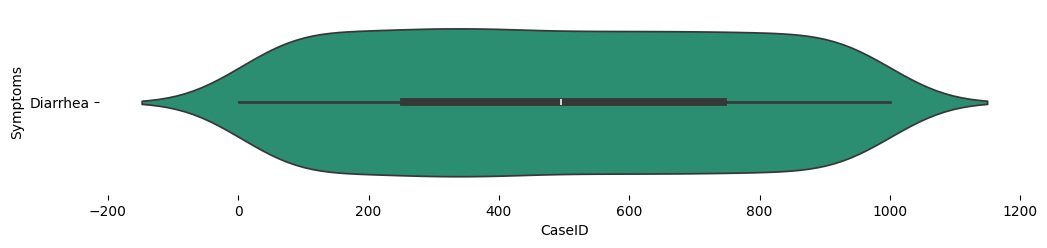

In [ ]:
# @title Symptoms vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cleaned_df['Symptoms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cleaned_df, x='CaseID', y='Symptoms', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-8-717c4839f90f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cleaned_df, x='CaseID', y='Transmission Route', inner='box', palette='Dark2')


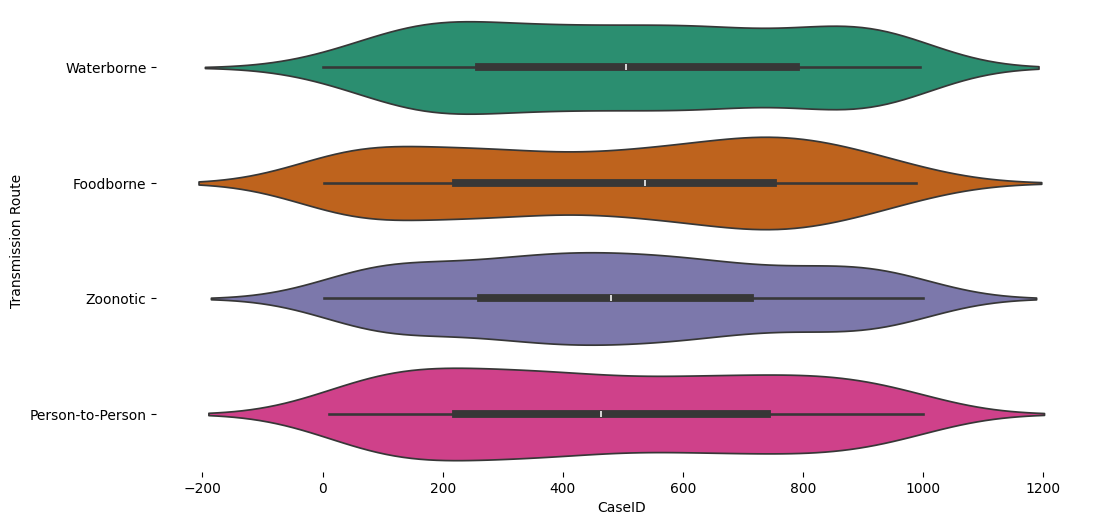

In [ ]:
# @title Transmission Route vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cleaned_df['Transmission Route'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cleaned_df, x='CaseID', y='Transmission Route', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-9-ddaffc0d2109>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cleaned_df, x='CaseID', y='Cause', inner='box', palette='Dark2')


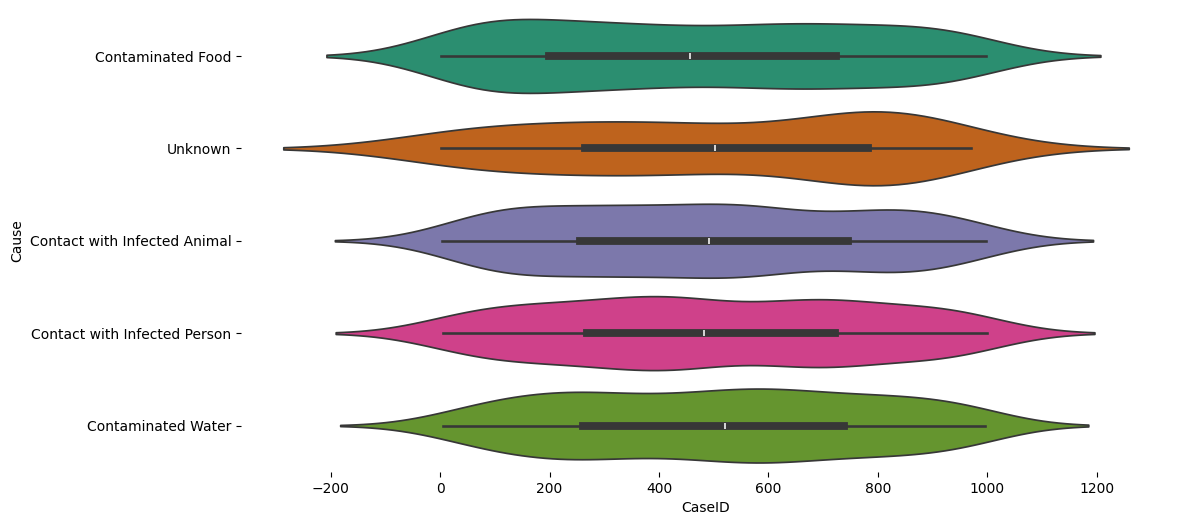

In [ ]:
# @title Cause vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cleaned_df['Cause'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cleaned_df, x='CaseID', y='Cause', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-10-e927919da440>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cleaned_df, x='CaseID', y='Gender', inner='box', palette='Dark2')


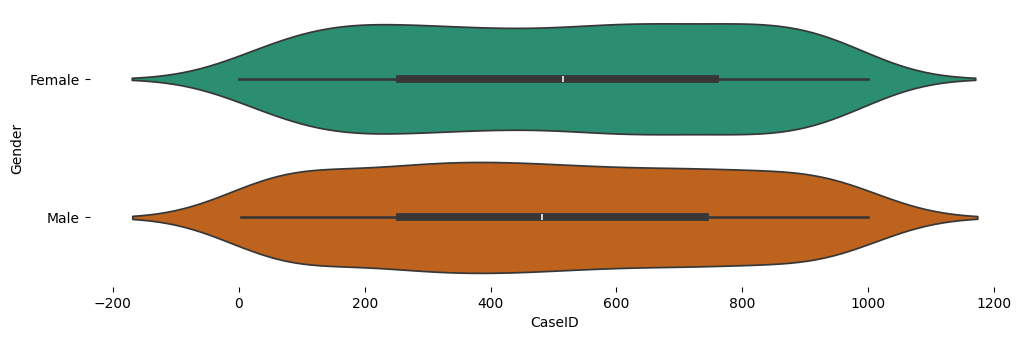

In [ ]:
# @title Gender vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cleaned_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cleaned_df, x='CaseID', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

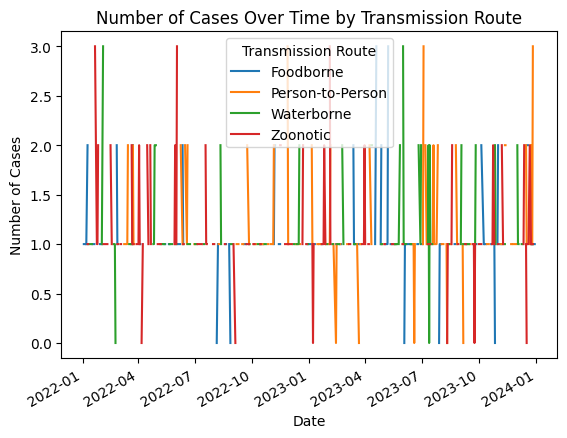

In [ ]:
# @title Number of Cases Over Time by Transmission Route

import matplotlib.pyplot as plt

cleaned_df.groupby(['Date', 'Transmission Route'])['CaseID'].count().unstack().plot()
plt.xlabel('Date')
plt.ylabel('Number of Cases')
_ = plt.title('Number of Cases Over Time by Transmission Route')

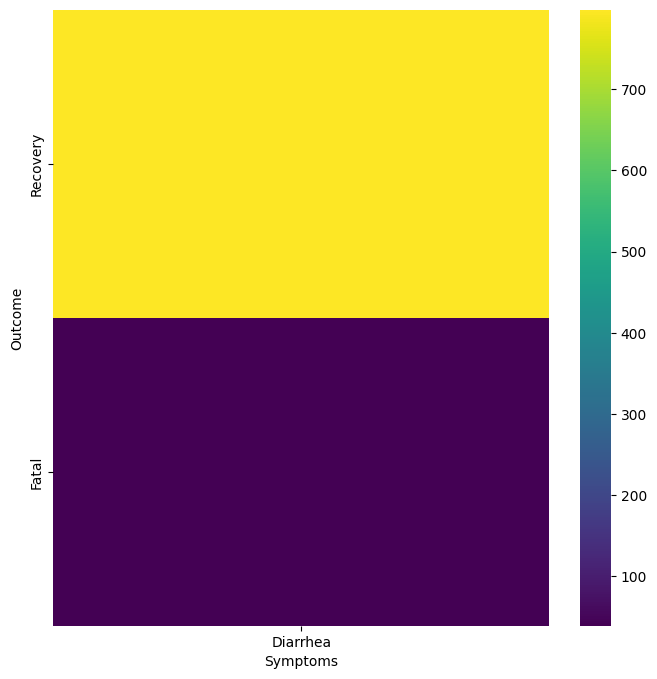

In [ ]:
# @title Symptoms vs Outcome

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Outcome'].value_counts()
    for x_label, grp in cleaned_df.groupby('Symptoms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Symptoms')
_ = plt.ylabel('Outcome')

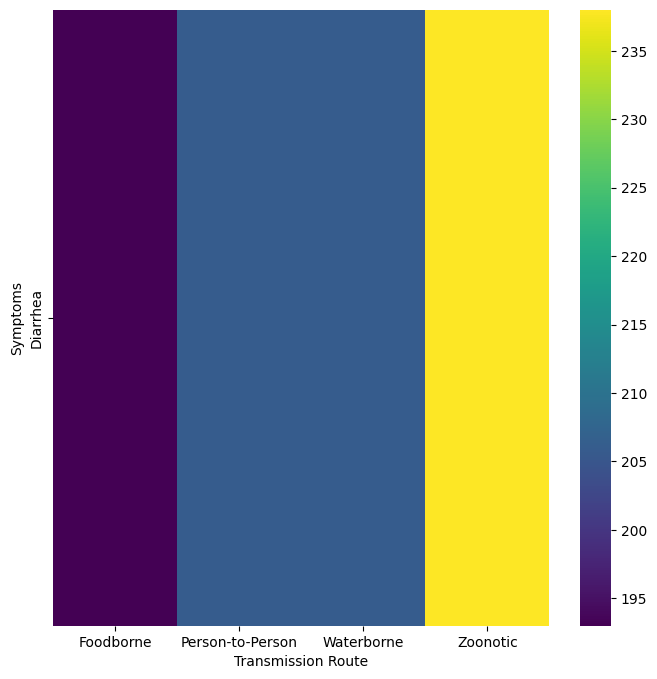

In [ ]:
# @title Transmission Route vs Symptoms

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Symptoms'].value_counts()
    for x_label, grp in cleaned_df.groupby('Transmission Route')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Transmission Route')
_ = plt.ylabel('Symptoms')

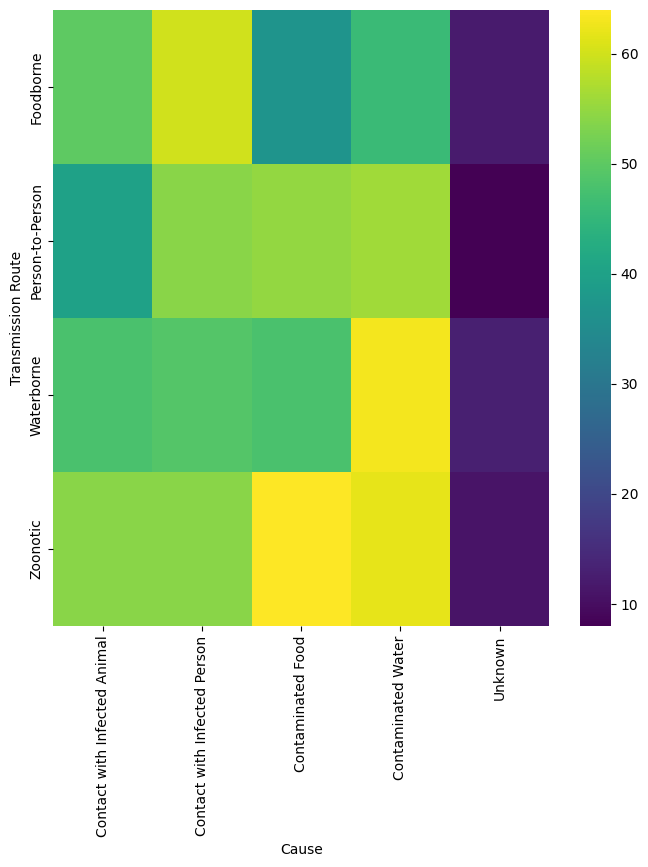

In [ ]:
# @title Cause vs Transmission Route

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transmission Route'].value_counts()
    for x_label, grp in cleaned_df.groupby('Cause')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cause')
_ = plt.ylabel('Transmission Route')

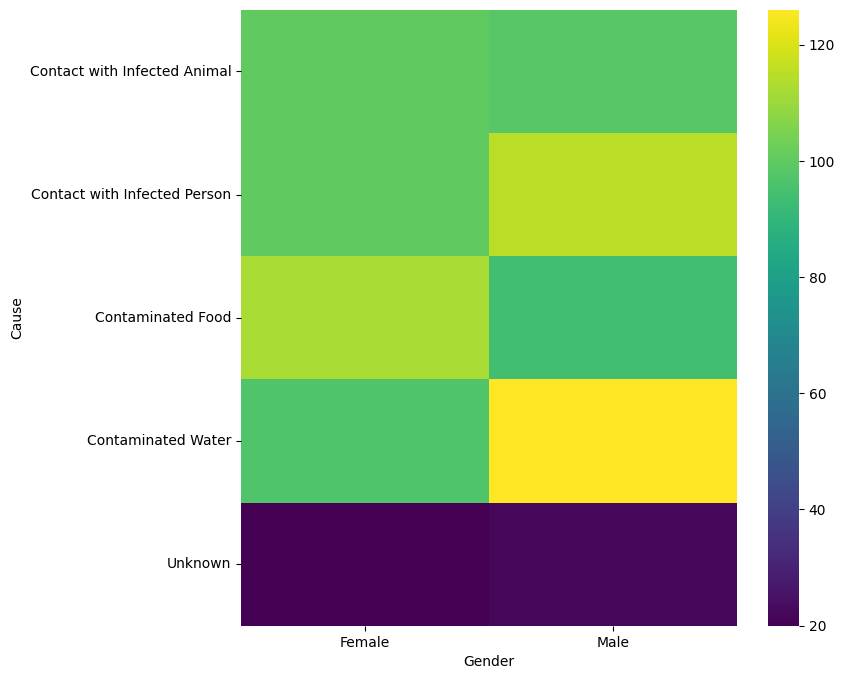

In [ ]:
# @title Gender vs Cause

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cause'].value_counts()
    for x_label, grp in cleaned_df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Cause')

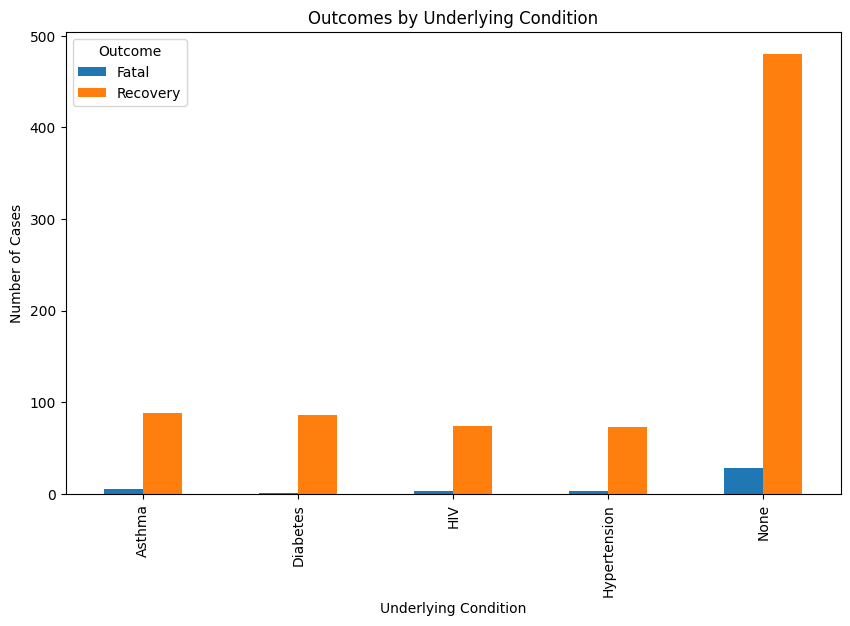

In [ ]:
# @title Outcomes by Underlying Condition

import matplotlib.pyplot as plt

# Group the data by underlying condition and outcome and count the occurrences
outcomes_by_condition = cleaned_df.groupby(['Underlying Conditions', 'Outcome'])['CaseID'].count().unstack()

# Create a grouped bar chart
outcomes_by_condition.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Underlying Condition')
plt.ylabel('Number of Cases')
_ = plt.title('Outcomes by Underlying Condition')

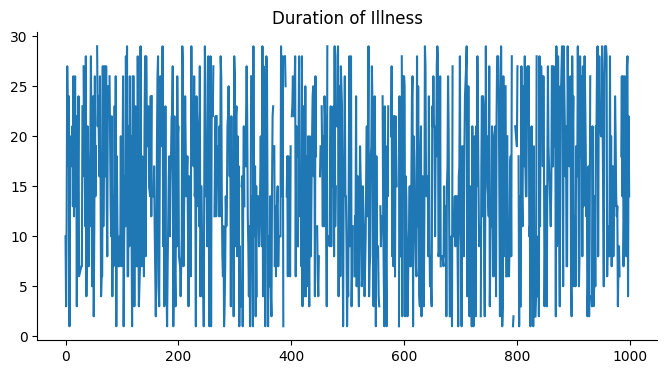

In [ ]:
# @title Duration of Illness

from matplotlib import pyplot as plt
cleaned_df['Duration of Illness'].plot(kind='line', figsize=(8, 4), title='Duration of Illness')
plt.gca().spines[['top', 'right']].set_visible(False)

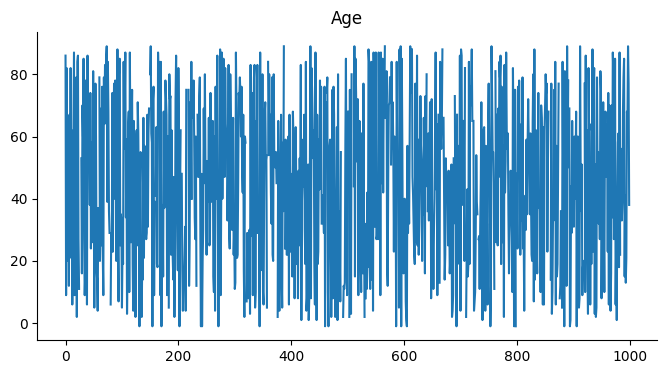

In [ ]:
# @title Age

from matplotlib import pyplot as plt
uploaded_df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

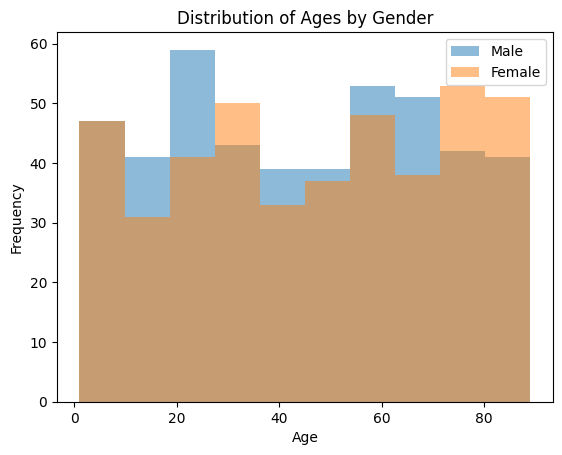

In [ ]:
# @title Distribution of Ages by Gender

import matplotlib.pyplot as plt

plt.hist(cleaned_df[cleaned_df['Gender'] == 'Male']['Age'], alpha=0.5, label='Male')
plt.hist(cleaned_df[cleaned_df['Gender'] == 'Female']['Age'], alpha=0.5, label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Gender')
_ = plt.legend()

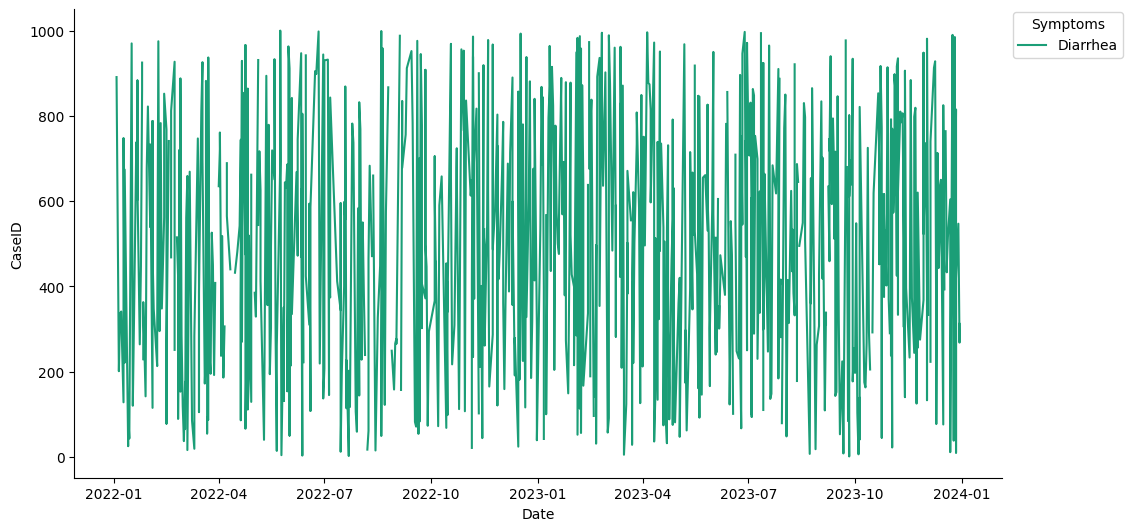

In [ ]:
# @title Date vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CaseID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cleaned_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Symptoms')):
  _plot_series(series, series_name, i)
  fig.legend(title='Symptoms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CaseID')

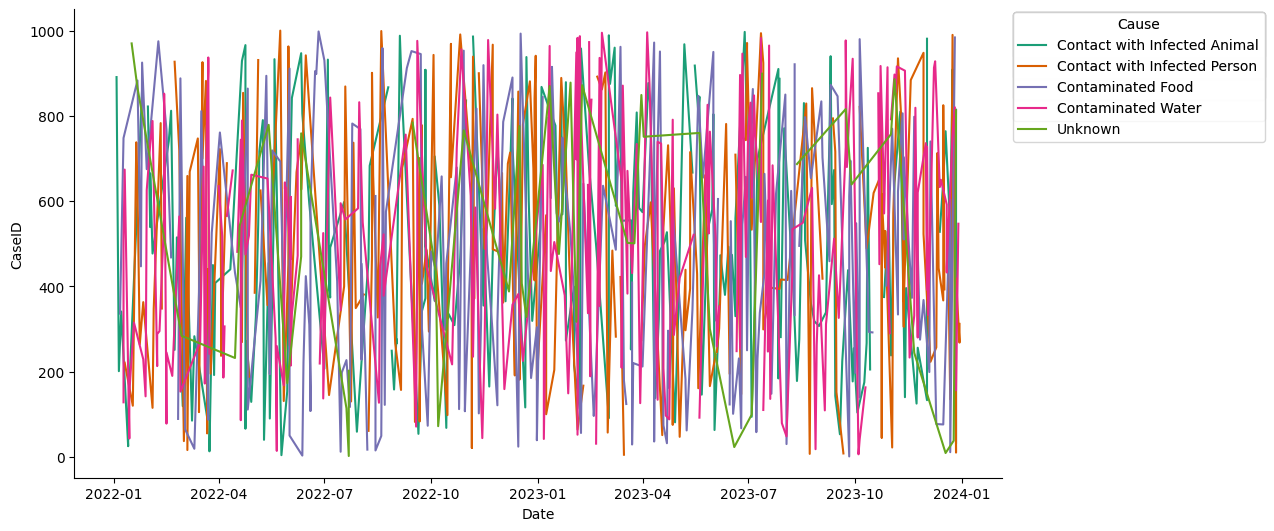

In [ ]:
# @title Date vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CaseID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cleaned_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Cause')):
  _plot_series(series, series_name, i)
  fig.legend(title='Cause', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CaseID')

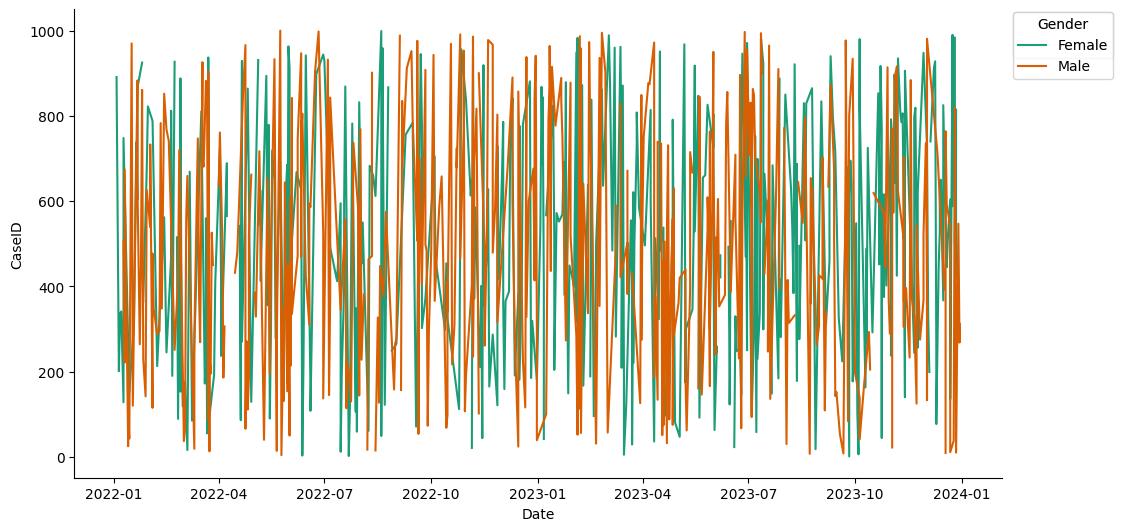

In [ ]:
# @title Date vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CaseID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cleaned_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CaseID')

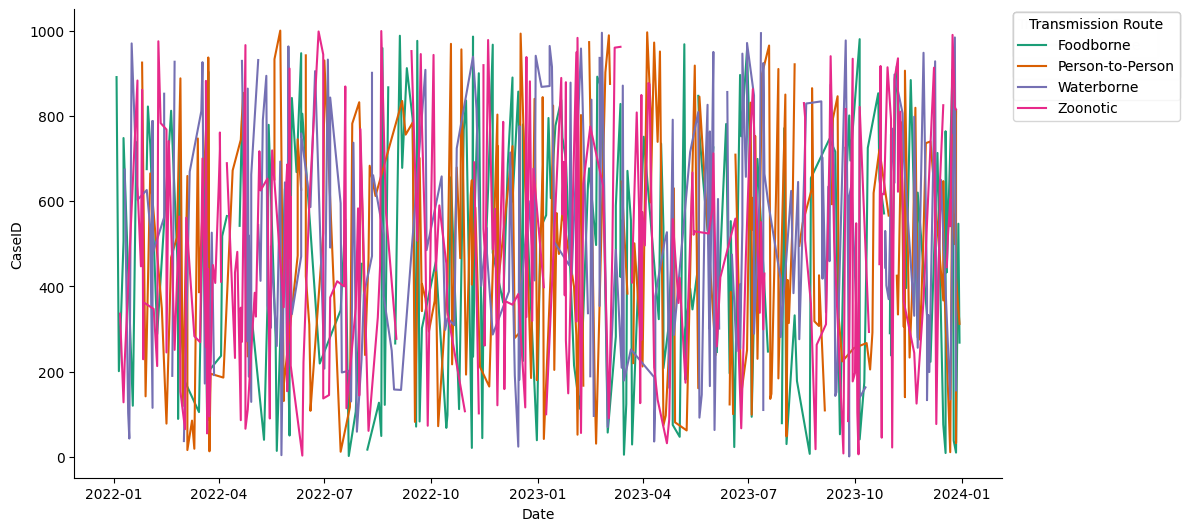

In [ ]:
# @title Date vs CaseID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CaseID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cleaned_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Transmission Route')):
  _plot_series(series, series_name, i)
  fig.legend(title='Transmission Route', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CaseID')

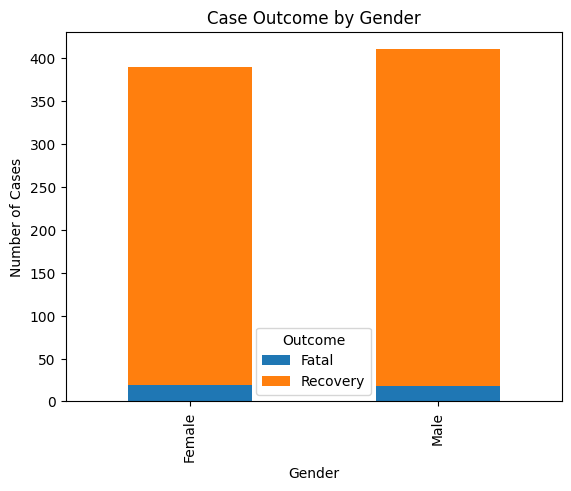

In [ ]:
# @title Case Outcome by Gender

import matplotlib.pyplot as plt

outcome_by_gender = cleaned_df.groupby(['Gender', 'Outcome'])['CaseID'].count().unstack()
outcome_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
_ = plt.title('Case Outcome by Gender')

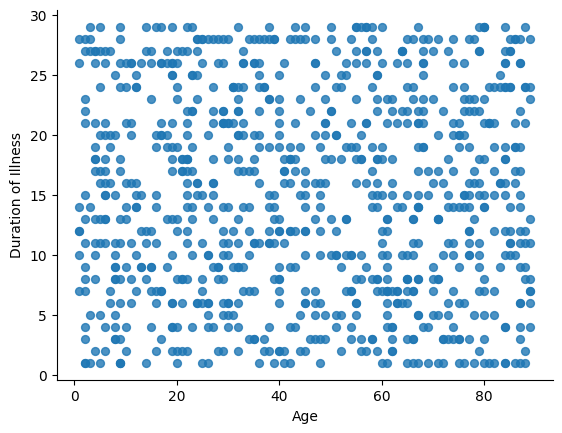

In [ ]:
# @title Age vs Duration of Illness

from matplotlib import pyplot as plt
cleaned_df.plot(kind='scatter', x='Age', y='Duration of Illness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

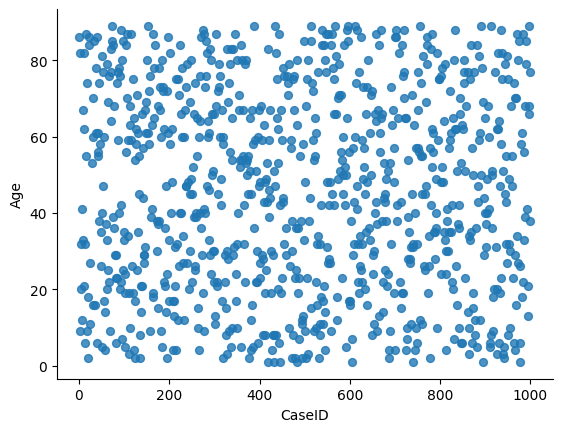

In [ ]:
# @title CaseID vs Age

from matplotlib import pyplot as plt
cleaned_df.plot(kind='scatter', x='CaseID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

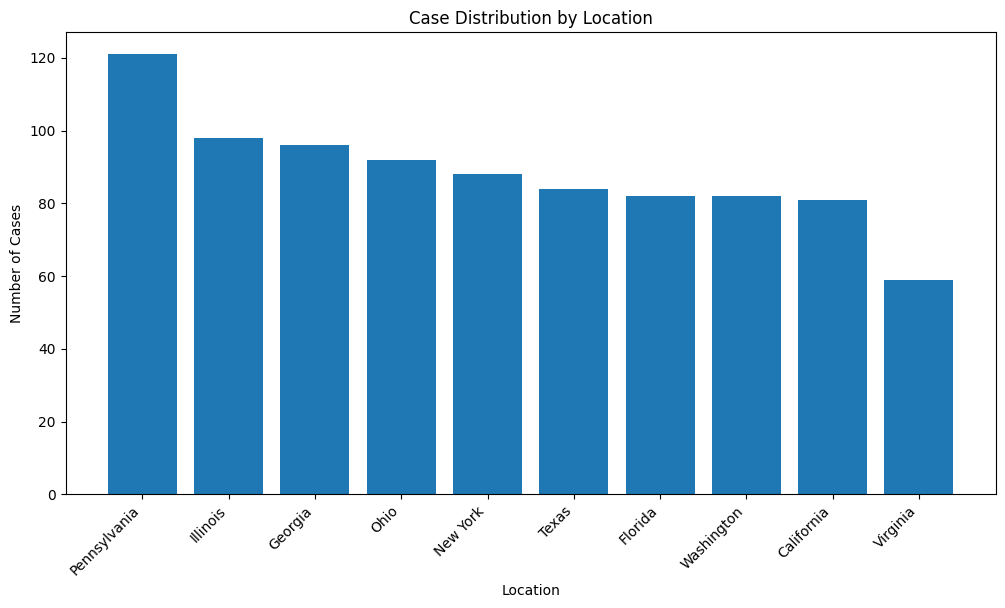

In [ ]:
# @title Case Distribution by Location

import matplotlib.pyplot as plt

location_counts = cleaned_df['Location'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Number of Cases')
plt.title('Case Distribution by Location')
_ = plt.xticks(rotation=45, ha='right')

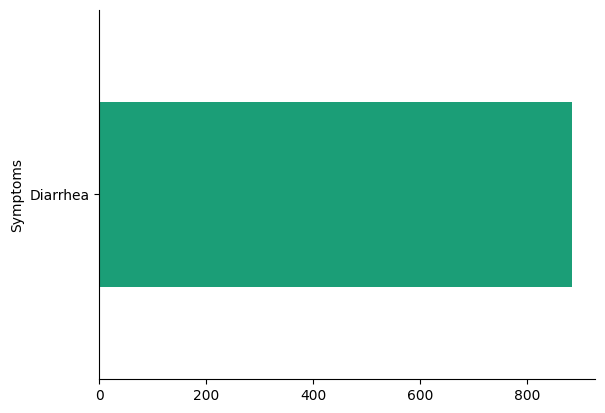

In [ ]:
# @title Symptoms

from matplotlib import pyplot as plt
import seaborn as sns
cleaned_df.groupby('Symptoms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

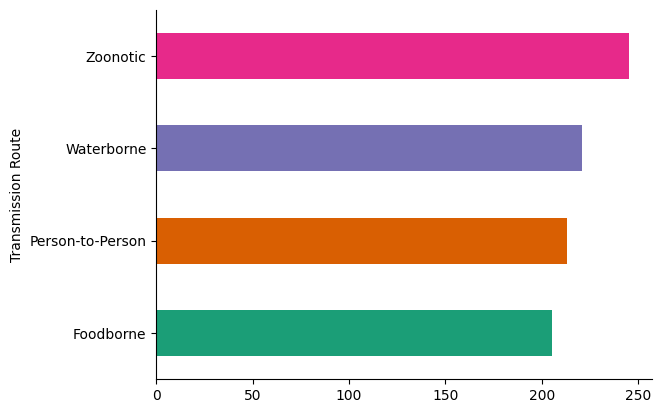

In [ ]:
# @title Transmission Route

from matplotlib import pyplot as plt
import seaborn as sns
cleaned_df.groupby('Transmission Route').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

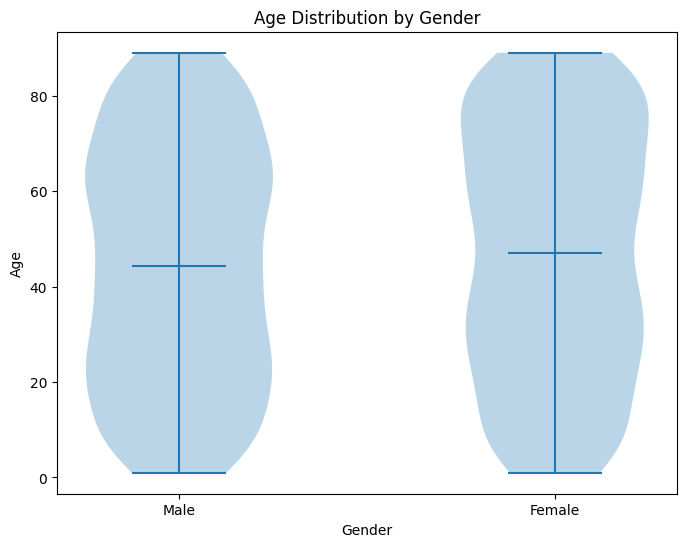

In [ ]:
# @title Age Distribution by Gender

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.violinplot([cleaned_df[cleaned_df['Gender'] == 'Male']['Age'], cleaned_df[cleaned_df['Gender'] == 'Female']['Age']], showmeans=True)
plt.xticks([1, 2], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Age')
_ = plt.title('Age Distribution by Gender')

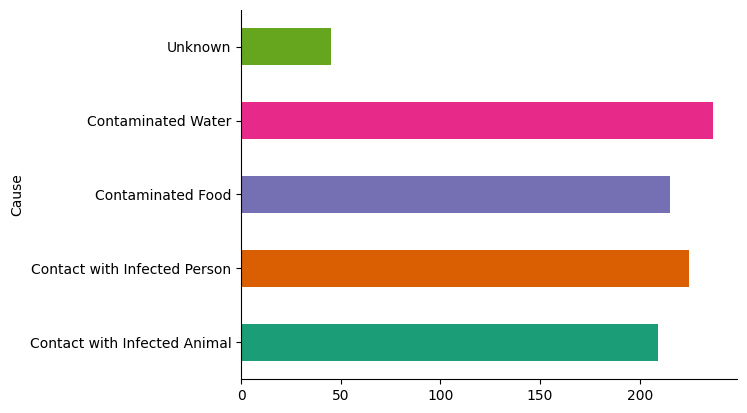

In [ ]:
# @title Cause

from matplotlib import pyplot as plt
import seaborn as sns
cleaned_df.groupby('Cause').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

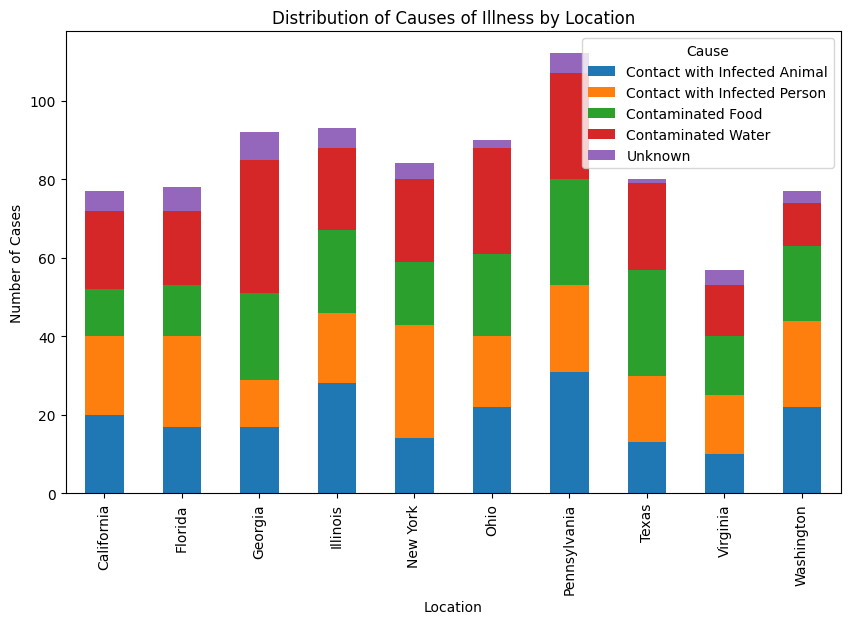

In [ ]:
# @title Distribution of Causes of Illness by Location

import matplotlib.pyplot as plt

# Group the data by location and cause and count occurrences
cause_counts = cleaned_df.groupby(['Location', 'Cause'])['CaseID'].count().unstack()

# Create a stacked bar chart
cause_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Location')
plt.ylabel('Number of Cases')
plt.title('Distribution of Causes of Illness by Location')
_ = plt.legend(title='Cause')

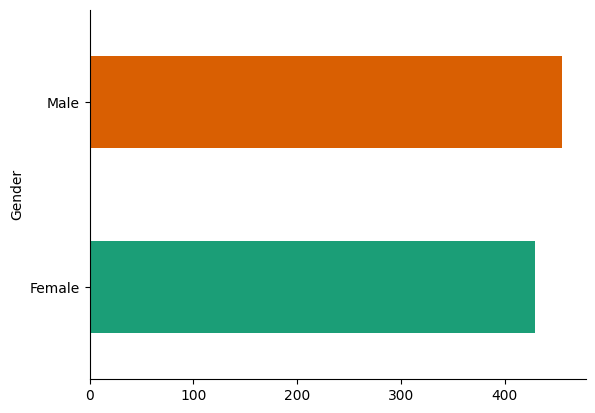

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
cleaned_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

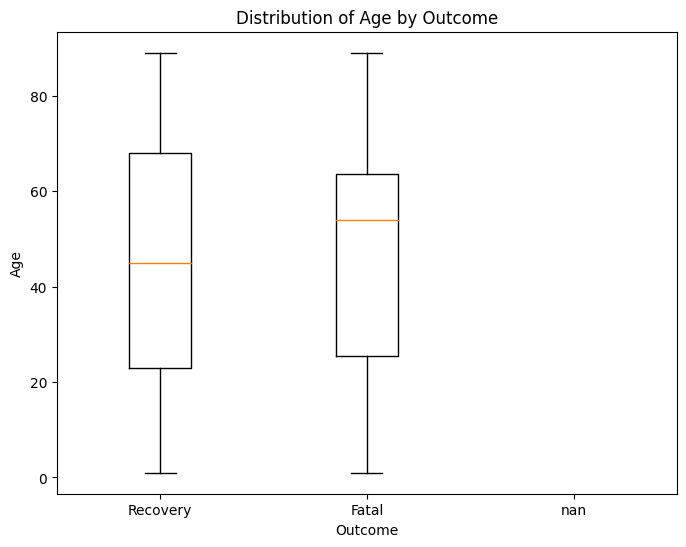

In [ ]:
# @title Distribution of Age by Outcome

import matplotlib.pyplot as plt

outcomes = cleaned_df['Outcome'].unique()

data = []
for outcome in outcomes:
    data.append(cleaned_df[cleaned_df['Outcome'] == outcome]['Age'])

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=outcomes)
plt.xlabel('Outcome')
plt.ylabel('Age')
_ = plt.title('Distribution of Age by Outcome')

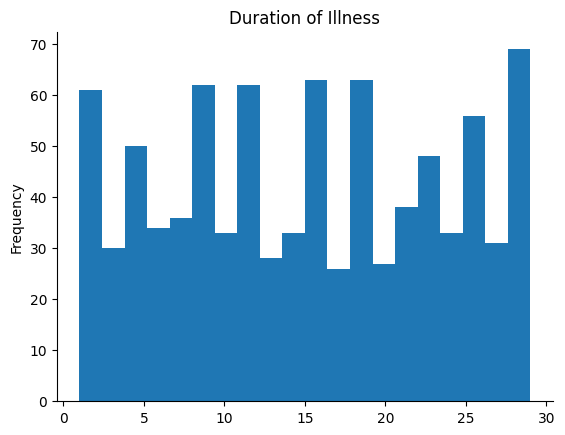

In [ ]:
# @title Duration of Illness

from matplotlib import pyplot as plt
cleaned_df['Duration of Illness'].plot(kind='hist', bins=20, title='Duration of Illness')
plt.gca().spines[['top', 'right',]].set_visible(False)

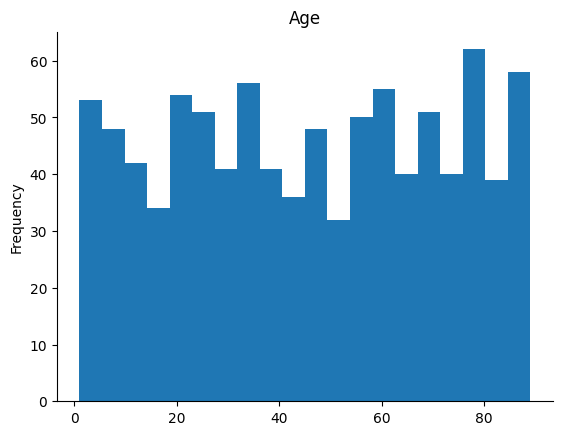

In [ ]:
# @title Age

from matplotlib import pyplot as plt
cleaned_df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

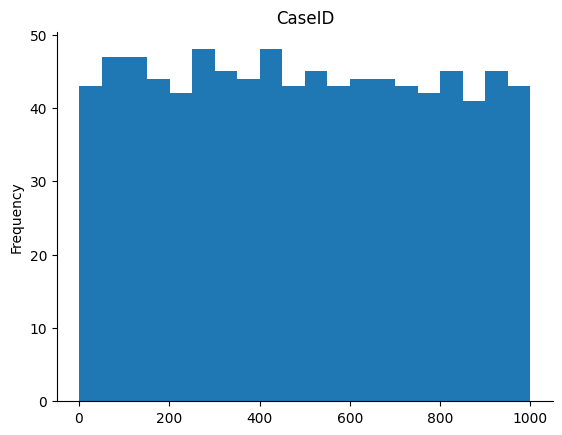

In [ ]:
# @title CaseID

from matplotlib import pyplot as plt
cleaned_df['CaseID'].plot(kind='hist', bins=20, title='CaseID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install researchpy


In [ ]:
import researchpy as rp
crosstab, test_results, expected = rp.crosstab(cleaned_df["Location"], cleaned_df["Outcome"],
                                                   test="chi-square",
                                                   expected_freqs=True,
                                                   prop="cell")
cramers_v = test_results['results'][2]
print("Cramer's V:", cramers_v)

Cramer's V: 0.0661


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 9.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 36.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
/usr/local/lib/python3.10/dist-packages/researchpy/crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 27.0) = ' has dtype incompatible with float64, please explicitly c

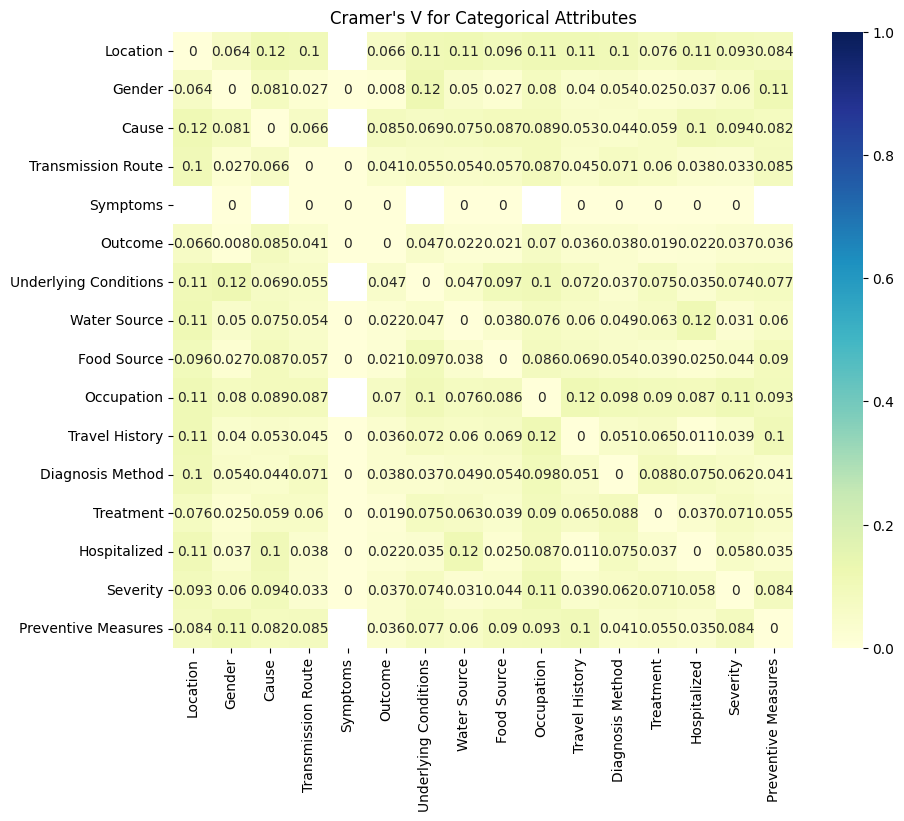

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the categorical (object) columns
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns

# Initialize a matrix to store Cramer's V values
cramers_matrix = np.zeros((len(categorical_cols), len(categorical_cols)))

# Calculate Cramer's V for each pair of categorical columns
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i != j:  # Don't calculate for the same column
            crosstab, test_results, expected = rp.crosstab(cleaned_df[col1], cleaned_df[col2],
                                                            test="chi-square",
                                                            expected_freqs=True,
                                                            prop="cell")
            cramers_matrix[i, j] = test_results['results'][2]  # Extract Cramer's V

# Create a DataFrame from the Cramer's V matrix
cramers_df = pd.DataFrame(cramers_matrix, index=categorical_cols, columns=categorical_cols)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_df, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Cramer's V for Categorical Attributes")
plt.show()

In [ ]:
# Select only the categorical (object) columns
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns

# Print unique values for each categorical column
for col in categorical_cols:
    unique_values = cleaned_df[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")

Unique values in column 'Location': ['Virginia' 'Georgia' 'Texas' 'Pennsylvania' 'California' 'Florida' 'Ohio'
 'Washington' 'New York' 'Illinois' nan]
Unique values in column 'Gender': ['Female' 'Male' nan]
Unique values in column 'Cause': ['Contaminated Food' 'Unknown' 'Contact with Infected Animal'
 'Contact with Infected Person' 'Contaminated Water']
Unique values in column 'Transmission Route': ['Waterborne' 'Foodborne' 'Zoonotic' 'Person-to-Person' nan]
Unique values in column 'Symptoms': ['Diarrhea' nan]
Unique values in column 'Outcome': ['Recovery' 'Fatal' nan]
Unique values in column 'Underlying Conditions': ['None' 'Hypertension' 'HIV' 'Asthma' 'Diabetes']
Unique values in column 'Water Source': ['River' 'Unknown' 'Well']
Unique values in column 'Food Source': ['Unknown' 'Home' 'Restaurant']
Unique values in column 'Occupation': ['Engineer' 'Chef' 'Office Worker' 'Retired' 'Farmer' 'Student' 'Nurse'
 'Veterinarian' nan 'Teacher']
Unique values in column 'Travel History': ['N

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def encode_categorical_columns(df):
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        # Check if the number of unique values is reasonable for one-hot encoding
        if df[col].nunique() <= 10:  # Adjust this threshold based on your data
            ohe = OneHotEncoder(handle_unknown='ignore')
            encoded_data = ohe.fit_transform(df[[col]])
            encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out([col]))
            df = df.drop(col, axis=1)
            df = pd.concat([df, encoded_df], axis=1)
        else:
            # Use label encoding if there are too many categories
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    return df

# Apply the encoding function to your DataFrame
cleaned_df_encoded = encode_categorical_columns(cleaned_df.copy())  # Create a copy to avoid modifying the original

print(cleaned_df_encoded.head())

   CaseID       Date   Age  Duration of Illness  Location_California  \
0     1.0 2023-09-26  86.0                 10.0                  0.0   
1     2.0 2022-07-22   9.0                  3.0                  0.0   
2     3.0 2022-06-12  82.0                 12.0                  0.0   
3     4.0 2022-05-25  20.0                 27.0                  0.0   
4     5.0 2023-03-16  32.0                 22.0                  1.0   

   Location_Florida  Location_Georgia  Location_Illinois  Location_New York  \
0               0.0               0.0                0.0                0.0   
1               0.0               1.0                0.0                0.0   
2               0.0               0.0                0.0                0.0   
3               0.0               0.0                0.0                0.0   
4               0.0               0.0                0.0                0.0   

   Location_Ohio  ...  Severity_Critical  Severity_Mild  Severity_Severe  \
0            0.0

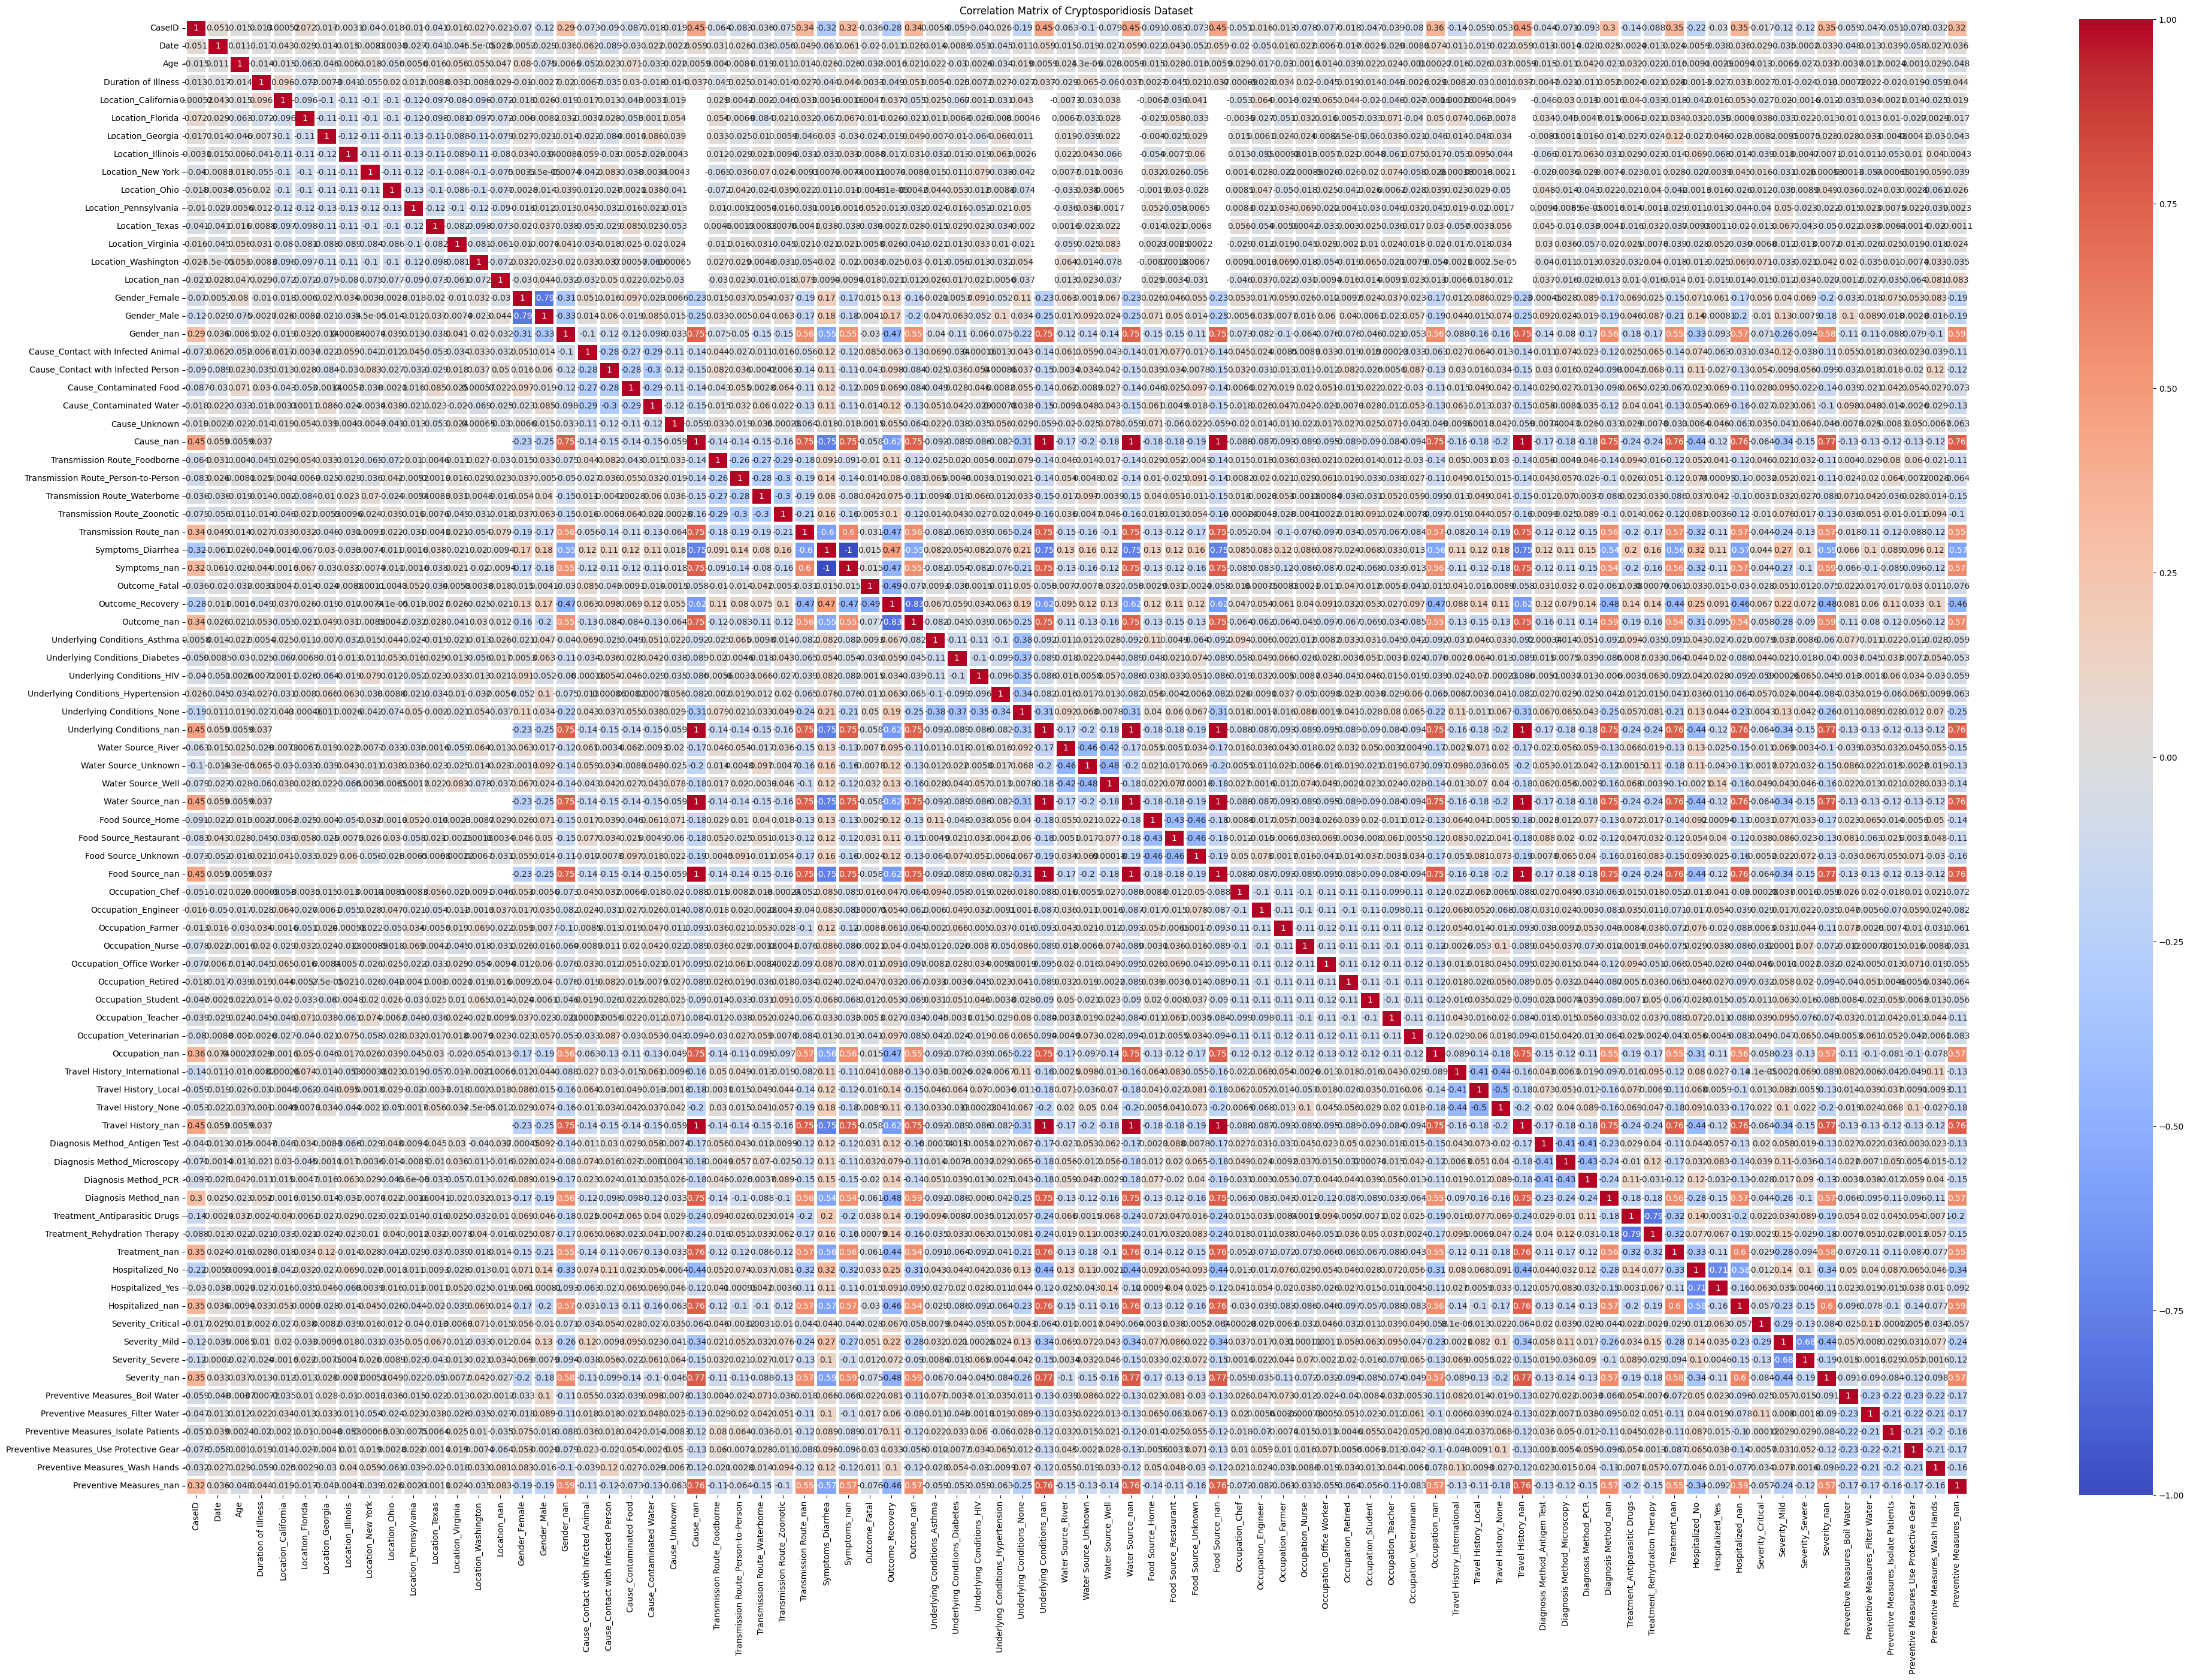

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = cleaned_df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(48, 32))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2.5)
plt.title('Correlation Matrix of Cryptosporidiosis Dataset')
plt.show()


1. Demographic and Outcome Attributes

   Attributes: Age, Gender, Outcome, Duration of Illness, Hospitalized, Severity

<ipython-input-44-7fe6134f0eb4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_outcome_df['Gender'] = demographic_outcome_df['Gender'].map({'Male': 1, 'Female': 0})
<ipython-input-44-7fe6134f0eb4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_outcome_df['Outcome'] = demographic_outcome_df['Outcome'].map({'Recovery': 1, 'Fatal': 0})
<ipython-input-44-7fe6134f0eb4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

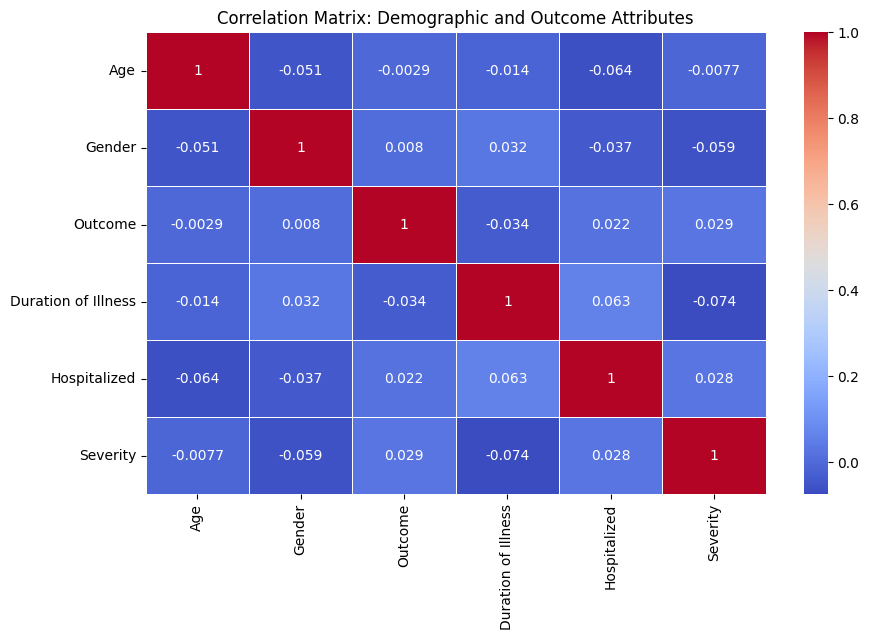

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select demographic and outcome attributes
demographic_outcome_df = cleaned_df[['Age', 'Gender', 'Outcome', 'Duration of Illness', 'Hospitalized', 'Severity']]

# Convert categorical data to numerical for correlation calculation
demographic_outcome_df['Gender'] = demographic_outcome_df['Gender'].map({'Male': 1, 'Female': 0})
demographic_outcome_df['Outcome'] = demographic_outcome_df['Outcome'].map({'Recovery': 1, 'Fatal': 0})
demographic_outcome_df['Hospitalized'] = demographic_outcome_df['Hospitalized'].map({'Yes': 1, 'No': 0})
demographic_outcome_df['Severity'] = demographic_outcome_df['Severity'].map({'Mild': 0, 'Severe': 1, 'Critical': 2})

# Calculate the correlation matrix
correlation_matrix_demo_outcome = demographic_outcome_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_demo_outcome, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Demographic and Outcome Attributes')
plt.show()


2. Environmental and Source Attributes

Attributes: Location, Cause, Water Source, Food Source, Travel History

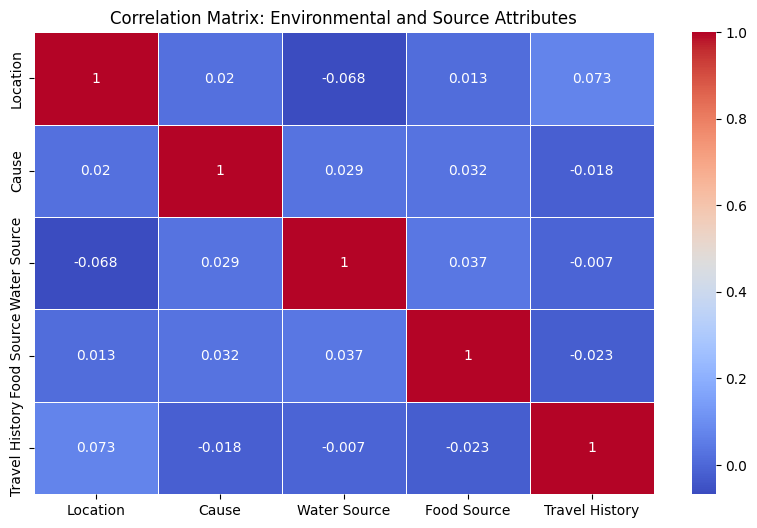

In [ ]:
# Select environmental and source attributes
environmental_source_df = cleaned_df[['Location', 'Cause', 'Water Source', 'Food Source', 'Travel History']]

# Convert categorical data to numerical for correlation calculation
environmental_source_df = environmental_source_df.apply(lambda x: pd.factorize(x)[0])

# Calculate the correlation matrix
correlation_matrix_env_source = environmental_source_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_env_source, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Environmental and Source Attributes')
plt.show()


3. Medical and Treatment Attributes


Attributes: Underlying Conditions, Diagnosis Method, Treatment, Preventive Measures

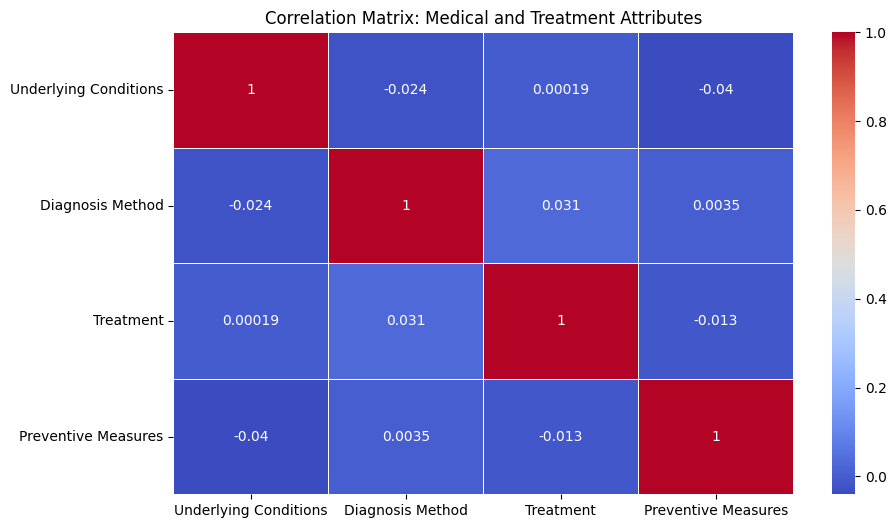

In [ ]:
# Select medical and treatment attributes
medical_treatment_df = cleaned_df[['Underlying Conditions', 'Diagnosis Method', 'Treatment', 'Preventive Measures']]

# Convert categorical data to numerical for correlation calculation
medical_treatment_df = medical_treatment_df.apply(lambda x: pd.factorize(x)[0])

# Calculate the correlation matrix
correlation_matrix_med_treat = medical_treatment_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_med_treat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Medical and Treatment Attributes')
plt.show()


1. Regression between Age and Duration of Illness

<ipython-input-47-07c2bb1aa520>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df.dropna(inplace=True)


                             OLS Regression Results                            
Dep. Variable:     Duration of Illness   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.1810
Date:                 Mon, 19 Aug 2024   Prob (F-statistic):              0.671
Time:                         16:26:36   Log-Likelihood:                -3131.9
No. Observations:                  883   AIC:                             6268.
Df Residuals:                      881   BIC:                             6277.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2401      0.568     26.83

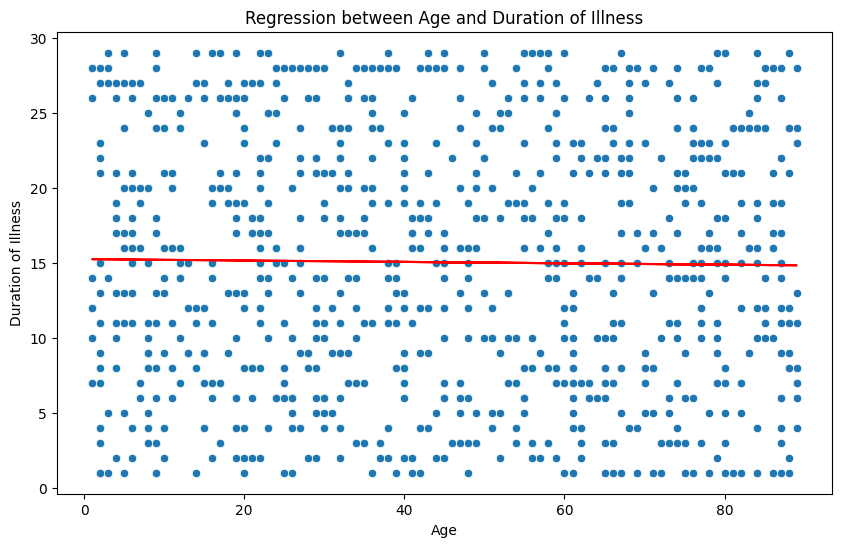

In [ ]:
import statsmodels.api as sm


# Select the relevant columns
regression_df = cleaned_df[['Age', 'Duration of Illness']]

# Drop rows with missing values
regression_df.dropna(inplace=True)

# Fit the regression model
X = regression_df['Age']
y = regression_df['Duration of Illness']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Duration of Illness', data=regression_df)
plt.plot(regression_df['Age'], predictions, color='red')
plt.title('Regression between Age and Duration of Illness')
plt.show()


2. Regression between Cause and Outcome


<ipython-input-48-c31c03b42298>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Cause'] = regression_df['Cause'].astype('category').cat.codes
<ipython-input-48-c31c03b42298>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Outcome'] = regression_df['Outcome'].map({'Recovery': 1, 'Fatal': 0})
<ipython-input-48-c31c03b42298>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.819
Date:                Mon, 19 Aug 2024   Prob (F-statistic):              0.178
Time:                        16:26:36   Log-Likelihood:                 104.30
No. Observations:                 883   AIC:                            -204.6
Df Residuals:                     881   BIC:                            -195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9380      0.012     76.627      0.0

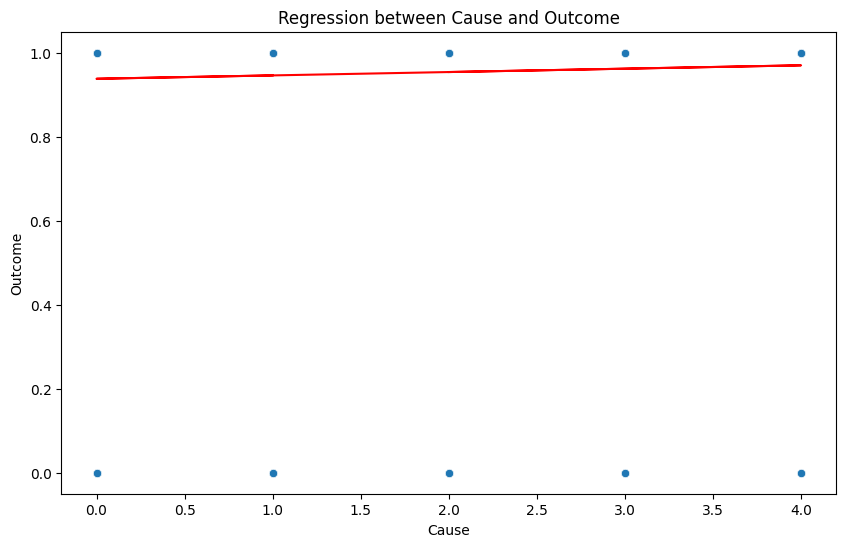

In [ ]:
# Select the relevant columns
regression_df = cleaned_df[['Cause', 'Outcome']]

# Encode categorical variables
regression_df['Cause'] = regression_df['Cause'].astype('category').cat.codes
regression_df['Outcome'] = regression_df['Outcome'].map({'Recovery': 1, 'Fatal': 0})

# Drop rows with missing values
regression_df.dropna(inplace=True)

# Fit the regression model
X = regression_df['Cause']
y = regression_df['Outcome']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cause', y='Outcome', data=regression_df)
plt.plot(regression_df['Cause'], predictions, color='red')
plt.title('Regression between Cause and Outcome')
plt.show()


3. Regression between Severity and Duration of Illness

<ipython-input-49-bf440ed3e9db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Severity'] = regression_df['Severity'].map({'Mild': 0, 'Severe': 1, 'Critical': 2})
<ipython-input-49-bf440ed3e9db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df.dropna(inplace=True)


                             OLS Regression Results                            
Dep. Variable:     Duration of Illness   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     4.624
Date:                 Mon, 19 Aug 2024   Prob (F-statistic):             0.0318
Time:                         16:26:37   Log-Likelihood:                -2981.2
No. Observations:                  842   AIC:                             5966.
Df Residuals:                      840   BIC:                             5976.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3960      0.343     44.92

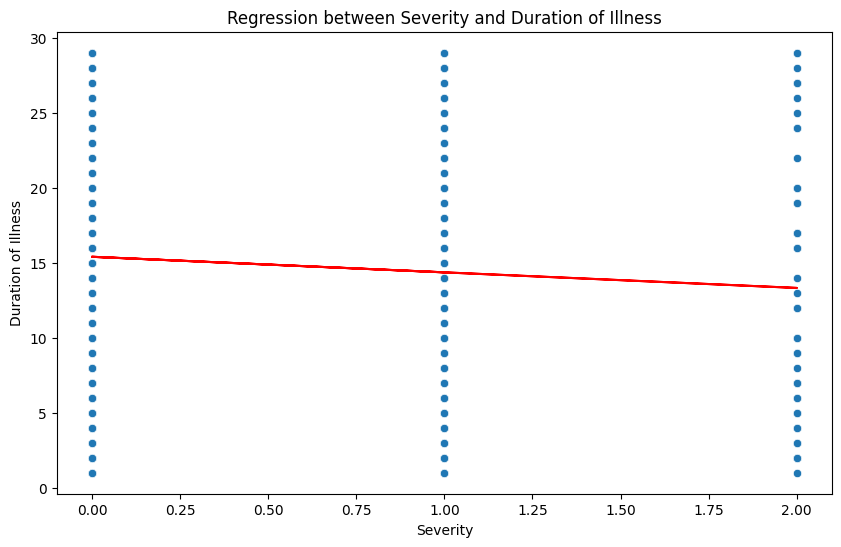

In [ ]:
# Select the relevant columns
regression_df = cleaned_df[['Severity', 'Duration of Illness']]

# Encode categorical variables
regression_df['Severity'] = regression_df['Severity'].map({'Mild': 0, 'Severe': 1, 'Critical': 2})

# Drop rows with missing values
regression_df.dropna(inplace=True)

# Fit the regression model
X = regression_df['Severity']
y = regression_df['Duration of Illness']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Severity', y='Duration of Illness', data=regression_df)
plt.plot(regression_df['Severity'], predictions, color='red')
plt.title('Regression between Severity and Duration of Illness')
plt.show()
